In [1]:
from autogluon.core.utils.loaders import load_zip
import os

download_dir = './ag_multimodal_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/petfinder_for_tutorial.zip'

load_zip.unzip(zip_file, unzip_dir=download_dir)

In [2]:
import pandas as pd

dataset_path = f'{download_dir}/petfinder_for_tutorial'

def invert_label(val):
    if val==1:
        return 0
    elif val==0:
        return 1
    else:
        return val

train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
# train_data['AdoptionSpeed_Inv'] = train_data['AdoptionSpeed'].apply(invert_label)
# train_data['final_label'] = train_data.apply(lambda row: [row['AdoptionSpeed'], row['AdoptionSpeed_Inv']], axis=1)
# train_data = train_data.drop(columns=['AdoptionSpeed_Inv', 'AdoptionSpeed'])

test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col=0)
# test_data['AdoptionSpeed_Inv'] = test_data['AdoptionSpeed'].apply(invert_label)
# test_data['final_label'] = test_data.apply(lambda row: [row['AdoptionSpeed'], row['AdoptionSpeed_Inv']], axis=1)
# test_data = test_data.drop(columns=['AdoptionSpeed_Inv', 'AdoptionSpeed'])

# label_col = ['AdoptionSpeed', 'AdoptionSpeed_Inv']
label_col = 'AdoptionSpeed'

In [3]:
image_col = 'Images'

train_data[image_col] = train_data[image_col].apply(lambda ele: ele.split(';')[0])
test_data[image_col] = test_data[image_col].apply(lambda ele: ele.split(';')[0])

def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

train_data[image_col] = train_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
test_data[image_col] = test_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))

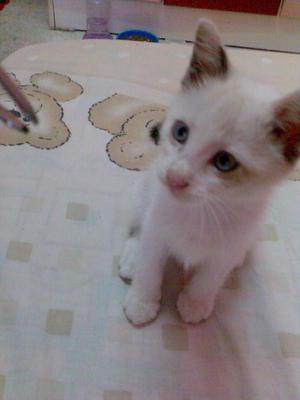

"I rescued Yumi Hamasaki at a food stall far away in Kelantan. At that time i was on my way back to KL, she was suffer from stomach problem and looking very2 sick.. I send her to vet & get the treatment + vaccinated and right now she's very2 healthy.. About yumi : - love to sleep with ppl - she will keep on meowing if she's hugry - very2 active, always seeking for people to accompany her playing - well trained (poo+pee in her own potty) - easy to bathing - I only feed her with these brands : IAMS, Kittenbites, Pro-formance Reason why i need someone to adopt Yumi: I just married and need to move to a new house where no pets are allowed :( As Yumi is very2 special to me, i will only give her to ppl that i think could take care of her just like i did (especially on her foods things).."

In [4]:
example_row = train_data.iloc[0]
example_image = example_row[image_col]

from IPython.display import Image, display
pil_img = Image(filename=example_image)
display(pil_img)

example_row['Description']

In [5]:
train_data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
0,2,Yumi Hamasaki,4,292,265,2,1,5,7,2,...,1,0,41326,bcc4e1b9557a8b3aaf545ea8e6e86991,0,I rescued Yumi Hamasaki at a food stall far aw...,7d7a39d71,3.0,0,/Users/anidagar/Desktop/Work/autogluon/experim...
1,2,Nene/ Kimie,12,285,0,2,5,6,7,2,...,1,0,41326,f0450bf0efe0fa3ff9321d0b827b1237,0,Has adopted by a friend with new pet name Kimie,0e107c82f,3.0,0,/Users/anidagar/Desktop/Work/autogluon/experim...
2,2,Mattie,12,266,0,2,1,7,0,2,...,1,0,41401,9b52af6d48a4521fd01d4028eb5879a3,0,I rescued Mattie with a broken leg. After surg...,1a8fd6707,5.0,0,/Users/anidagar/Desktop/Work/autogluon/experim...
3,1,NaN,1,189,307,2,1,2,0,2,...,1,0,41401,88da1210e021a5cf43480b074778f3bc,0,She born on 30 September . I really hope the a...,bca8b44ae,3.0,0,/Users/anidagar/Desktop/Work/autogluon/experim...
4,2,Coco,6,276,285,2,2,4,7,2,...,1,100,41326,227d7b1bcfaffb5f9882bf57b5ee8fab,0,Calico Tame and easy going Diet RC Kitten Supp...,2def67952,1.0,0,/Users/anidagar/Desktop/Work/autogluon/experim...


In [6]:
from autogluon.multimodal import MultiModalPredictor

predictor = MultiModalPredictor(label=label_col, problem_type='classification').fit(
    train_data=train_data,
    time_limit=120
)

No path specified. Models will be saved in: "AutogluonModels/ag-20231025_000756"
/Users/anidagar/Desktop/Work/autogluon/core/src/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
INFO: Global seed set to 0
AutoMM starts to create your model. ✨

- AutoGluon version is 0.8.3b20231003.

- Pytorch version is 2.0.1.

- Model will be saved to "/Users/anidagar/Desktop/Work/autogluon/experimental/experimental/AutogluonModels/ag-20231025_000756".

- Va

Sanity Checking: 0it [00:00, ?it/s]

/Users/anidagar/miniconda3/envs/autogluon/lib/python3.10/site-packages/timm/models/swin_transformer.py:292: UserWarning: The operator 'aten::roll' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  shifted_x = torch.roll(x, shifts=(-self.shift_size[0], -self.shift_size[1]), dims=(1, 2))


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: Epoch 0, global step 1: 'val_roc_auc' reached 0.40056 (best 0.40056), saving model to '/Users/anidagar/Desktop/Work/autogluon/experimental/experimental/AutogluonModels/ag-20231025_000756/epoch=0-step=1.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

INFO: Epoch 0, global step 4: 'val_roc_auc' reached 0.40056 (best 0.40056), saving model to '/Users/anidagar/Desktop/Work/autogluon/experimental/experimental/AutogluonModels/ag-20231025_000756/epoch=0-step=4.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:02:01. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

Start to fuse 2 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model 🎉🎉🎉

- To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/Users/anidagar/Desktop/Work/autogluon/experimental/experimental/AutogluonModels/ag-20231025_000756")
    ```

- You can open a terminal and launch Tensorboard to visualize the training log:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /Users/anidagar/Desktop/Work/autogluon/experimental/experimental/AutogluonModels/ag-20231025_000756
    ```

- If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub: https://github.com/autogluon/autogluon




In [ ]:
from autogluon.multimodal import MultiModalPredictor

predictor = MultiModalPredictor(label=label_col, problem_type='classification').fit(
    train_data=train_data,
    time_limit=120
)

No path specified. Models will be saved in: "AutogluonModels/ag-20231025_000257"
/Users/anidagar/Desktop/Work/autogluon/core/src/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
INFO: Global seed set to 0
AutoMM starts to create your model. ✨

- AutoGluon version is 0.8.3b20231003.

- Pytorch version is 2.0.1.

- Model will be saved to "/Users/anidagar/Desktop/Work/autogluon/experimental/experimental/AutogluonModels/ag-20231025_000257".

- Va

Sanity Checking: 0it [00:00, ?it/s]

> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(221)_shared_step()
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
--> 221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss



ipdb>  batch


{'timm_image_image': tensor([[[[[ 0.7762,  0.8104,  0.7933,  ...,  0.8276,  0.8104,  0.7762],
           [ 0.8276,  0.7933,  0.7419,  ...,  0.8104,  0.7762,  0.7933],
           [ 0.7762,  0.7248,  0.6734,  ...,  0.8104,  0.7591,  0.7933],
           ...,
           [ 0.7762,  1.5297,  2.0605,  ...,  0.3138,  0.2453,  0.2624],
           [ 1.2043,  1.2899,  1.9407,  ...,  0.2967,  0.1768,  0.2282],
           [ 1.5297,  1.3413,  1.5810,  ...,  0.2453,  0.1939,  0.2282]],

          [[ 0.0301,  0.0651,  0.0476,  ...,  0.8704,  0.8529,  0.8179],
           [ 0.0826,  0.0476, -0.0049,  ...,  0.8529,  0.8179,  0.8354],
           [ 0.0301, -0.0224, -0.0749,  ...,  0.8529,  0.8004,  0.8354],
           ...,
           [ 0.4503,  1.2031,  1.6758,  ...,  0.4153,  0.3452,  0.3627],
           [ 0.7829,  0.8880,  1.5532,  ...,  0.3978,  0.2752,  0.3277],
           [ 1.0105,  0.8880,  1.1331,  ...,  0.3452,  0.2927,  0.3102]],

          [[-0.2184, -0.1835, -0.2010,  ...,  0.4962,  0.4788,  0.4

ipdb>  l


    216         label = batch[self.model.label_key]
    217         if self.mixup_fn is not None:
    218             self.mixup_fn.mixup_enabled = self.training & (self.current_epoch < self.hparams.mixup_off_epoch)
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
--> 221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss
    224 
    225     def training_step(self, batch, batch_idx):
    226         """



ipdb>  self.model


MultimodalFusionMLP(
  (model): ModuleList(
    (0): HFAutoModelForTextPrediction(
      (model): ElectraModel(
        (embeddings): ElectraEmbeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): ElectraEncoder(
          (layer): ModuleList(
            (0-11): 12 x ElectraLayer(
              (attention): ElectraAttention(
                (self): ElectraSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): 

ipdb>  l


    227         Per training step. This function is registered by LightningModule.
    228         Refer to https://lightning.ai/docs/pytorch/stable/common/lightning_module.html#training-loop
    229 
    230         Parameters
    231         ----------
    232         batch
    233             A dictionary containing the mini-batch data, including both input data and
    234             ground-truth labels. The mini-batch data are passed to each individual model,
    235             which indexes its required input data by keys with its model prefix. The
    236             ground-truth labels are used here to compute the training loss.
    237         batch_idx



ipdb>  n


/Users/anidagar/miniconda3/envs/autogluon/lib/python3.10/site-packages/timm/models/swin_transformer.py:292: UserWarning: The operator 'aten::roll' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  shifted_x = torch.roll(x, shifts=(-self.shift_size[0], -self.shift_size[1]), dims=(1, 2))


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(222)_shared_step()
    220         import pdb; pdb.set_trace()
    221         output = run_model(self.model, batch)
--> 222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss
    224 



ipdb>  output


{'timm_image': {'weight': tensor(0.1000), 'logits': tensor([[inf, inf],
        [-inf, -inf],
        [-inf, -inf],
        [-inf, -inf],
        [inf, -inf],
        [-inf, -inf],
        [inf, -inf],
        [-inf, inf]], device='mps:0')}, 'fusion_mlp': {'logits': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0'), 'features': tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='mps:0'), 'weight': tensor(1., device='mps:0')}}


ipdb>  l


    217         if self.mixup_fn is not None:
    218             self.mixup_fn.mixup_enabled = self.training & (self.current_epoch < self.hparams.mixup_off_epoch)
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
    221         output = run_model(self.model, batch)
--> 222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss
    224 
    225     def training_step(self, batch, batch_idx):
    226         """
    227         Per training step. This function is registered by LightningModule.



ipdb>  label


tensor([0, 1, 0, 0, 1, 0, 0, 0], device='mps:0')


ipdb>  self._compute_loss(output=output, label=label)


tensor(nan, device='mps:0')


ipdb>  c


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(221)_shared_step()
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
--> 221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss



ipdb>  n


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(222)_shared_step()
    220         import pdb; pdb.set_trace()
    221         output = run_model(self.model, batch)
--> 222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss
    224 



ipdb>  output


{'timm_image': {'weight': tensor(0.1000), 'logits': tensor([[-inf, -inf],
        [-inf, -inf],
        [inf, -inf],
        [-inf, -inf],
        [inf, -inf],
        [inf, inf],
        [-inf, inf],
        [inf, inf]], device='mps:0')}, 'fusion_mlp': {'logits': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0'), 'features': tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='mps:0'), 'weight': tensor(1., device='mps:0')}}


ipdb>  n


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(223)_shared_step()
    221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
--> 223         return output, loss
    224 
    225     def training_step(self, batch, batch_idx):



ipdb>  loss


tensor(nan, device='mps:0')


ipdb>  c


Training: 0it [00:00, ?it/s]

> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(221)_shared_step()
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
--> 221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss



ipdb>  loss


*** NameError: name 'loss' is not defined


ipdb>  n


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(222)_shared_step()
    220         import pdb; pdb.set_trace()
    221         output = run_model(self.model, batch)
--> 222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss
    224 



ipdb>  output


{'timm_image': {'weight': tensor(0.1000), 'logits': tensor([[inf, -inf],
        [inf, -inf],
        [inf, -inf],
        [inf, -inf],
        [inf, inf],
        [inf, inf],
        [-inf, -inf],
        [-inf, inf]], device='mps:0', grad_fn=<DivBackward0>)}, 'fusion_mlp': {'logits': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<LinearBackward0>), 'features': tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='mps:0',
       grad_fn=<MulBackward0>), 'weight': tensor(1., device='mps:0')}}


ipdb>  c


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(221)_shared_step()
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
--> 221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss



ipdb>  loss


*** NameError: name 'loss' is not defined


ipdb>  n


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(222)_shared_step()
    220         import pdb; pdb.set_trace()
    221         output = run_model(self.model, batch)
--> 222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss
    224 



ipdb>  output


{'timm_image': {'weight': tensor(0.1000), 'logits': tensor([[inf, inf],
        [-inf, inf],
        [-inf, -inf],
        [-inf, inf],
        [-inf, inf],
        [-inf, -inf],
        [-inf, -inf],
        [-inf, inf]], device='mps:0', grad_fn=<DivBackward0>)}, 'fusion_mlp': {'logits': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<LinearBackward0>), 'features': tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='mps:0',
       grad_fn=<MulBackward0>), 'weight': tensor(1., device='mps:0')}}


ipdb>  c


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(221)_shared_step()
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
--> 221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss



ipdb>  c


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(221)_shared_step()
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
--> 221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss



ipdb>  c


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(221)_shared_step()
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
--> 221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss



ipdb>  c


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(221)_shared_step()
    219             batch, label = multimodel_mixup(batch=batch, model=self.model, mixup_fn=self.mixup_fn)
    220         import pdb; pdb.set_trace()
--> 221         output = run_model(self.model, batch)
    222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss



ipdb>  output


*** NameError: name 'output' is not defined


ipdb>  n


> /Users/anidagar/Desktop/Work/autogluon/multimodal/src/autogluon/multimodal/optimization/lit_module.py(222)_shared_step()
    220         import pdb; pdb.set_trace()
    221         output = run_model(self.model, batch)
--> 222         loss = self._compute_loss(output=output, label=label)
    223         return output, loss
    224 



ipdb>  output


{'timm_image': {'weight': tensor(0.1000), 'logits': tensor([[-inf, -inf],
        [-inf, -inf],
        [-inf, inf],
        [inf, -inf],
        [-inf, inf],
        [inf, inf],
        [inf, -inf],
        [-inf, -inf]], device='mps:0', grad_fn=<DivBackward0>)}, 'fusion_mlp': {'logits': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<LinearBackward0>), 'features': tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='mps:0',
       grad_fn=<MulBackward0>), 'weight': tensor(1., device='mps:0')}}


ipdb>  q


In [ ]:
from autogluon.multimodal import MultiModalPredictor
predictor = MultiModalPredictor.load("/Users/anidagar/Desktop/Work/autogluon/experimental/experimental/AutogluonModels/ag-20231022_224902")

In [ ]:
predictions = predictor.predict(test_data.drop(columns=label_col))
predictions[:5]

In [8]:
probs = predictor.predict_proba(test_data.drop(columns=label_col))
probs[:5]

Predicting: 0it [00:00, ?it/s]

,0,1
8,0.5,0.5
70,0.5,0.5
82,0.5,0.5
28,0.5,0.5
63,0.5,0.5


In [11]:
scores = predictor.evaluate(test_data, metrics=["roc_auc"])
scores

Predicting: 0it [00:00, ?it/s]

{'roc_auc': 0.5}

In [13]:
label_col

'AdoptionSpeed'

In [14]:
multilabel_col = ['AdoptionSpeed', 'PhotoAmt']
multilabel_col

['AdoptionSpeed', 'PhotoAmt']

In [26]:
_multi_label = True if isinstance(multilabel_col, list) and len(label_col)>1 else False

In [27]:
_multi_label

True

In [23]:
isinstance(multilabel_col, list)

True

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
6118,51,Private,39264,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
23204,58,Private,51662,10th,6,Married-civ-spouse,Other-service,Wife,White,Female,0,0,8,United-States,<=50K
29590,40,Private,326310,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44,United-States,<=50K
18116,37,Private,222450,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,2339,40,El-Salvador,<=50K
33964,62,Private,109190,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,40,United-States,>50K


No path specified. Models will be saved in: "AutogluonModels/ag-20231004_033607"


ValueError: Provided DataFrame does not contain label column: ['education-num', 'education', 'class']